# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import seaborn as seabornInstance 
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
CSV_FILE = 'sha-pek.csv'
COLUMNS =  ["departureDate","price",'priceClass','arrivalDate','rate']
nRowsRead = 20000 # specify 'None' if want to read whole file
#dataFrame = pd.read_csv( CSV_FILE , delimiter=',', nrows = nRowsRead, usecols = COLUMNS)
dataFrame = pd.read_csv( CSV_FILE , delimiter=',', nrows = nRowsRead,na_filter=True).fillna(value = "missing")
nRow, nCol = dataFrame.shape
print('There are '+str(nRow)+' rows and '+str(nCol)+' columns')
dataFrame['departureDate'] = pd.to_datetime(dataFrame['departureDate'])
dataFrame['arrivalDate'] = pd.to_datetime(dataFrame['arrivalDate'])
dataFrame['createDate'] = pd.to_datetime(dataFrame['createDate'])
dataFrame['rate'] = pd.to_numeric(dataFrame['rate'], errors='coerce')
#dataFrame['price'] = pd.to_numeric(dataFrame['price'], errors='coerce')
dataFrame.head()
#dataFrame['createDate']


There are 20000 rows and 14 columns


,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,78246995,CA1550,77W,SHA,missing,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,Z,2980,0.52,2019-07-17 02:32:27,-1
1,78246997,CA1550,77W,SHA,missing,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,J,5810,1.00,2019-07-17 02:32:27,-1
2,78246998,CA1550,77W,SHA,missing,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,D,3730,0.65,2019-07-17 02:32:27,-1
3,78246999,CA1550,77W,SHA,missing,PEK,2019-07-16 19:55:00,2019-07-16 22:10:00,C,C,4170,0.72,2019-07-17 02:32:27,-1
4,78247002,MU5125,33L,SHA,missing,PEK,2019-07-16 20:05:00,2019-07-16 22:10:00,C,I,2000,0.36,2019-07-17 02:32:27,-1


# Checks for any null value

In [3]:
#Check for null value, if there are any null values, remove or fill with dummy value
dataFrame.isnull().values.any()

False

# Plot Data

Text(0,0.5,'Price')

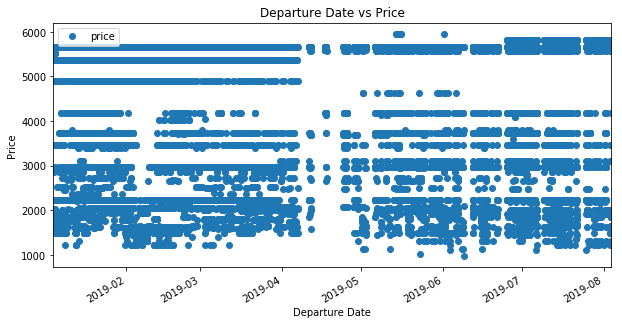

In [11]:
#dataFrame.plot()
dataFrame.plot(x='departureDate', y='price', style='o',figsize=(10, 5))  
plt.title('Departure Date vs Price')  
plt.xlabel('Departure Date')  
plt.ylabel('Price')  
#plt.show()


In [50]:
dt = dataFrame['departureDate'].values
dt = dt.astype('datetime64[D]').astype(int)
X = dt.reshape(-1,1)
y = dataFrame['price'].values.reshape(-1,1)

# Split 80% of the data to the training set while 20% of the data to test 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('length of X_train and x_test: ', len(X_train), len(X_test))
#y_test

('length of X_train and x_test: ', 16000, 4000)


# Lets train the model

In [52]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Predict the rates

In [53]:
y_pred = regressor.predict(X_train)
#y_pred

# Test with a value

In [54]:
test_list = ["2020-05-01T07:00:00.000000000"]
#dt_test_list = {"departureDate": ['2019-07-16 19:55:00']}
dt_test_list = {"departureDate": test_list}
df_test = pd.DataFrame(dt_test_list) 
df_test['departureDate'] = pd.to_datetime(df_test['departureDate'])
dftest_dt = df_test['departureDate'].values.reshape(-1,1)
dftest_dt = dftest_dt.astype('datetime64[D]').astype(int)
y_pred_1 = regressor.predict(dftest_dt)
y_pred_1
#X_test

array([[3963.66175211]])